## Importing Suitable Libraries

In [154]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Loading the dataset from seaborn

In [157]:
titanic_data= sns.load_dataset('titanic')

In [159]:
titanic_data.head(10)   # diplaying first 10 records

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


In [161]:
titanic_data.shape   ## describing shape of given dataset

(891, 15)

In [163]:
titanic_data.info()   # to get info about count of not-null objects columnwise with datatypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [165]:
titanic_data.describe()## Summary statistics for numerical columns
titanic_data.describe(include='all')

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
count,891.000000,891.000000,891,714.000000,891.000000,891.000000,891.000000,889,891,891,891,203,889,891,891
unique,NaN,NaN,2,NaN,NaN,NaN,NaN,3,3,3,2,7,3,2,2
top,NaN,NaN,male,NaN,NaN,NaN,NaN,S,Third,man,True,C,Southampton,no,True
freq,NaN,NaN,577,NaN,NaN,NaN,NaN,644,491,537,537,59,644,549,537
mean,0.383838,2.308642,NaN,29.699118,0.523008,0.381594,32.204208,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,0.486592,0.836071,NaN,14.526497,1.102743,0.806057,49.693429,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,1.000000,NaN,0.420000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,0.000000,2.000000,NaN,20.125000,0.000000,0.000000,7.910400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,0.000000,3.000000,NaN,28.000000,0.000000,0.000000,14.454200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,1.000000,3.000000,NaN,38.000000,1.000000,0.000000,31.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [167]:
titanic_data.isnull().sum()     ## Checking for missing values in each column

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

## Data Preprocessing

In [170]:
titanic = titanic_data.copy()   # creating a copy of dataframe

### Handling missing values

In [ ]:
# Separate numerical and categorical columns

numerical_cols = titanic.select_dtypes(include=['number']).columns

categorical_cols = titanic.select_dtypes(exclude=['number']).columns

In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor

## for numerical columns we can use IterativeImputer for handling and filling missing values
imputer_num = IterativeImputer(estimator=RandomForestRegressor(), random_state=0)

titanic[numerical_cols] = imputer_num.fit_transform(titanic[numerical_cols])

In [187]:
titanic['age'].fillna(titanic['age'].median())   ## Filling missing 'age' values with median as most suitable for age

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    28.0
889    26.0
890    32.0
Name: age, Length: 889, dtype: float64

In [175]:
titanic['embarked'].fillna(titanic['embarked'].mode()[0])  ## Fill 'embarked' or other categorical features (varibles) with mode (most frequent port)

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: embarked, Length: 891, dtype: object

In [177]:
titanic.drop(columns=['deck'], inplace=True)  ## Drop 'deck' column due to high number of missing values

In [179]:
titanic.dropna(subset=['embark_town'], inplace=True)   ## Drop rows with missing 'embark_town' column value as it is important

In [185]:
titanic.isnull().sum()     ## Checking for missing values again after handling them in each column

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

## Univariate Analysis - Distribution

### Histograms

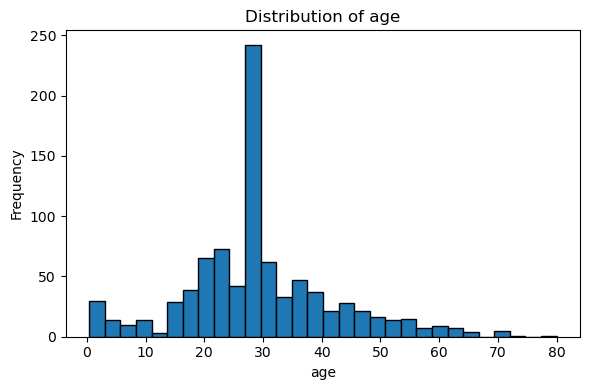

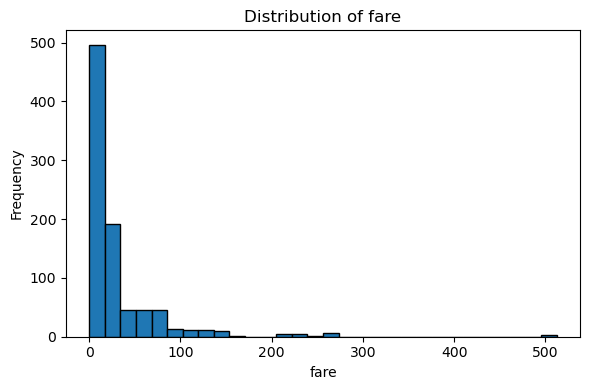

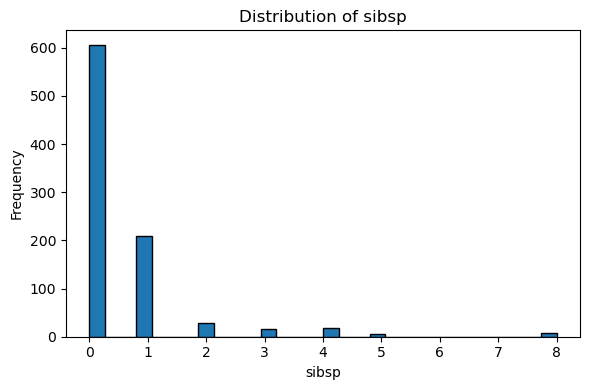

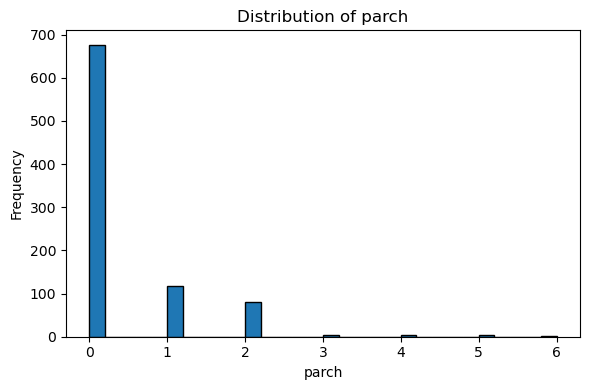

In [125]:
# Histogram for multiple numerical features
num_features = ['age', 'fare', 'sibsp', 'parch']

for col in num_features:
    plt.figure(figsize=(6, 4))
    plt.hist(titanic[col], bins=30, edgecolor='black')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

### Subplot of Boxplots

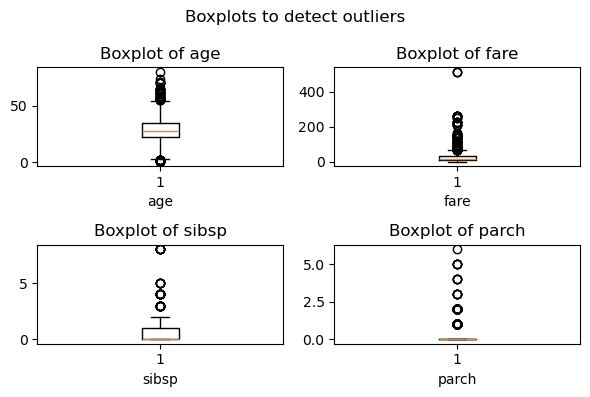

In [128]:
# Creating Boxplots for detecting outliers in same numerical features
fig, ax = plt.subplots(2,2, figsize=(6, 4))
ax = ax.flatten()
for i, col in enumerate(num_features):
    ax[i].boxplot(titanic[col])
    ax[i].set_title(f'Boxplot of {col}')
    ax[i].set_xlabel(col)
fig.suptitle('Boxplots to detect outliers')
plt.tight_layout()
plt.show()


In [130]:
## Note: Clear Outlies seen in fare and in age

## Bivariate Analysis - Relationships

### Using Scatterplot

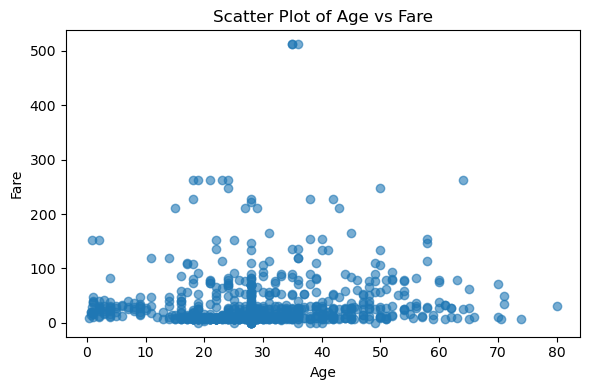

In [134]:
# Scatterplot: Age vs Fare
plt.figure(figsize=(6, 4))
plt.scatter(titanic['age'], titanic['fare'], alpha=0.6)
plt.title('Scatter Plot of Age vs Fare')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.tight_layout()
plt.show()

### Using Heatmap : Correlation Matrix

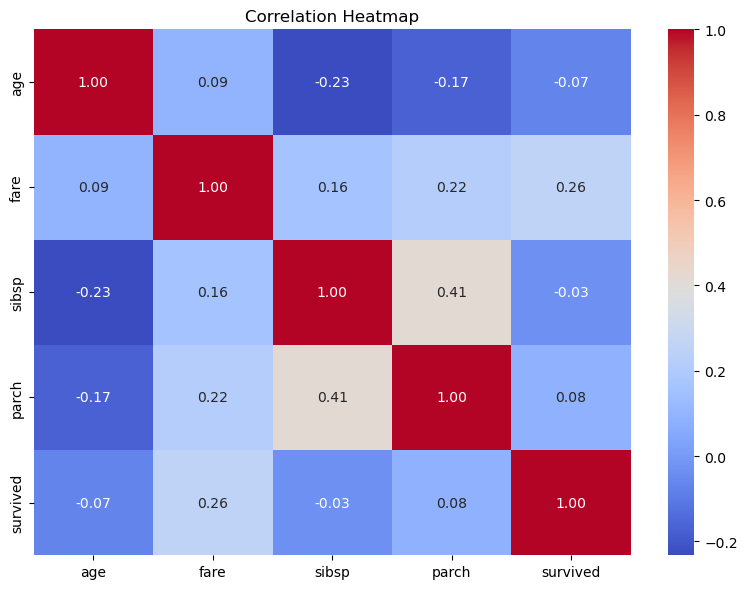

In [137]:
corr = titanic[num_features + ['survived']].corr()  # using numerical features only

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

In [139]:
## Analysis of Survived by Gender using countplot

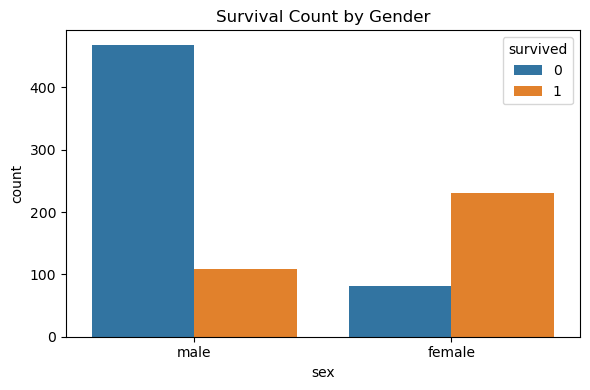

In [141]:
plt.figure(figsize=(6, 4))
sns.countplot(x='sex', hue='survived', data=titanic)
plt.title('Survival Count by Gender')
plt.tight_layout()
plt.show()

In [143]:
## Analysis of Survived by Passenger Class using countplot

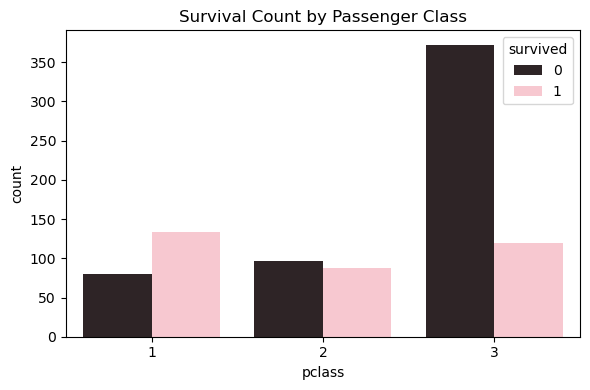

In [145]:
plt.figure(figsize=(6, 4))
sns.countplot(x='pclass', hue='survived', data=titanic, palette='dark:pink')
plt.title('Survival Count by Passenger Class')
plt.tight_layout()
plt.show()

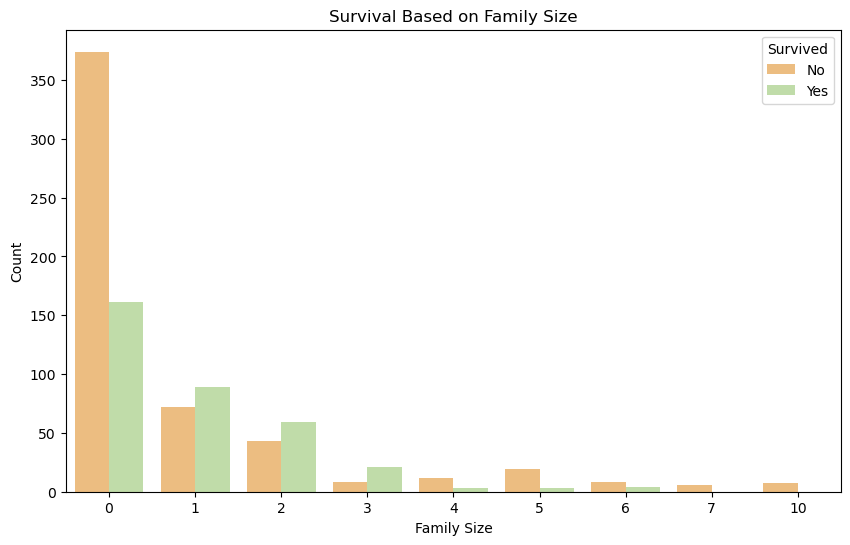

In [146]:
# Family Size Analysis
titanic['family_size'] = titanic['sibsp'] + titanic['parch']

plt.figure(figsize=(10, 6))
sns.countplot(x='family_size', hue='survived', data=titanic, palette='Spectral')
plt.title('Survival Based on Family Size')
plt.xlabel('Family Size')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()
